### Data Info

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The dataset is taken from kaggle - https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

### Data Dictionary

1. RowNumber - Row Numbers from 1 to 10000
2. CustomerId - Unique Ids for bank customer identification
3. Surname - Customer's last name
4. CreditScore - Credit score of the customer
5. Geography - The country from which the customer belongs
6. Gender - Male or Female
7. Age - Age of the customer
8. Tenure - Number of years for which the customer has been with the bank
9. Balance - Bank balance of the customer
10. NumOfProducts - Number of bank products the customer is utilising
11. HasCrCard - Binary Flag for whether the customer holds a credit card with the bank or not
12. IsActiveMember - Binary Flag for whether the customer is an active member with the bank or not
13. EstimatedSalary - Estimated salary of the customer in Dollars
14. Exited - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

### Importing the Data and E.D.A.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_df = pd.read_csv('../datasets/Customer_Churn.csv')

In [3]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
customer_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber is exactly like index (used to identify the rows in the dataset) so that can be dropped also surname is another column that I can consider dropping 
because it's a categorical column which has too many unique values (which also don't follow any ordinal relationship) so if we try to create dummies from it 
then the dimensionality is going to increase which might make the models difficult to find patterns in the data. We can also consider dropping customer_id column because that too doesn't have any ordinal relationship and it's similar to RowNumber column.

In [6]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
customer_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Fortunately there aren't any missing values in the dataset so the only step before proceeding to machine learning is encoding 
the categorical variables

In [8]:
customer_df = customer_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


Let's visualize the data

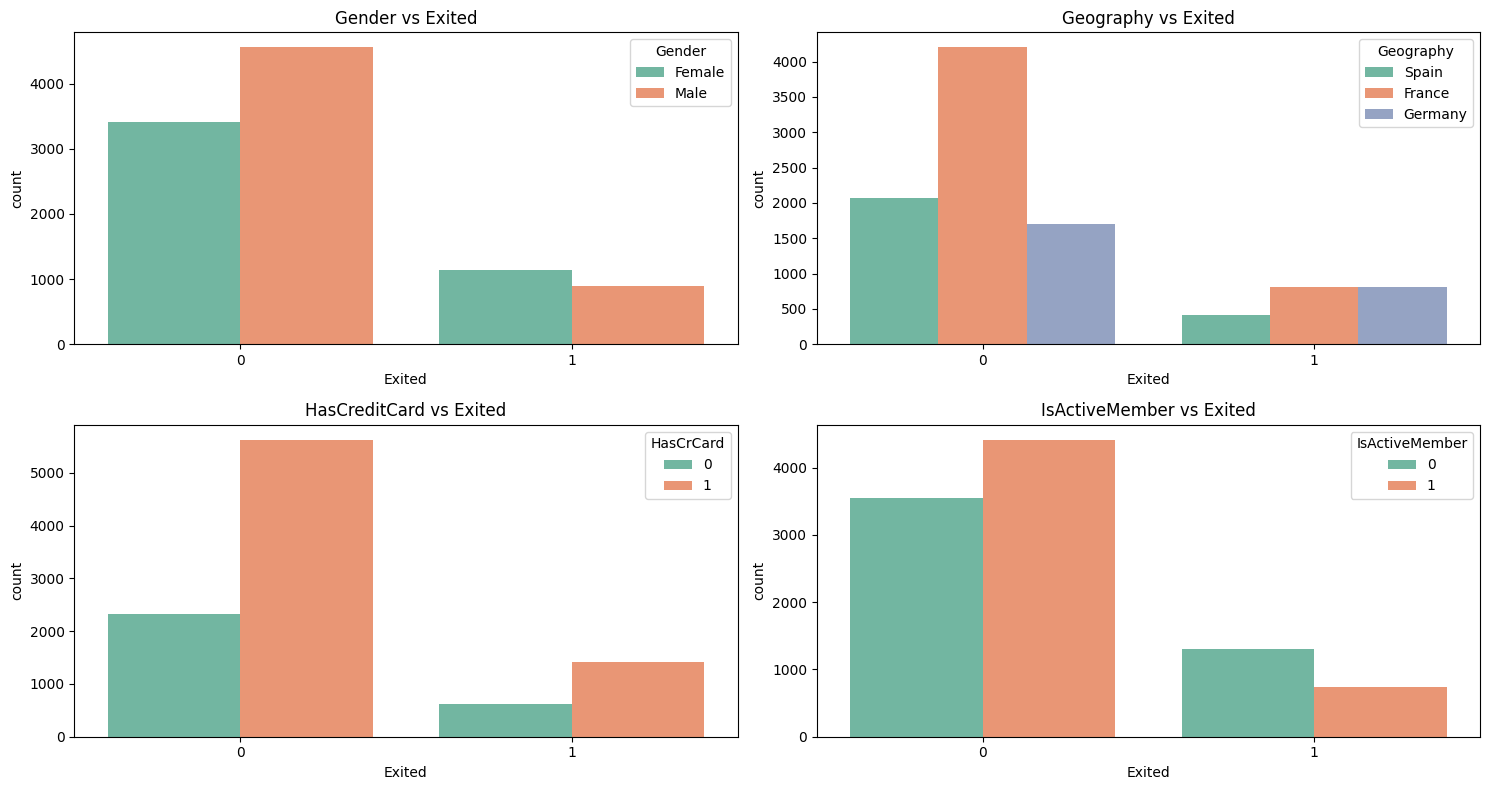

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

sns.countplot(x='Exited', hue='Gender', data=customer_df, palette='Set2', ax=axes[0,0])
axes[0,0].set_title('Gender vs Exited')

sns.countplot(x='Exited', hue='Geography', data=customer_df, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Geography vs Exited')

sns.countplot(x='Exited', hue='HasCrCard', data=customer_df, palette='Set2', ax=axes[1,0])
axes[1,0].set_title('HasCreditCard vs Exited')

sns.countplot(x='Exited', hue='IsActiveMember', data=customer_df, palette='Set2', ax=axes[1,1])
axes[1,1].set_title('IsActiveMember vs Exited')

plt.tight_layout()

plt.show()

#### In the above visualization we can observe the following things:

1. In all the charts it's clear that the number of exited customers is less than the number of people who stayed back.

**Gender count vs Exited**
1. More number of male customers are retained than female customers and slightly more number of female customers exited than male customers.

**Geography vs Exited** 
1. France has the highest number of customers retained followed by Spain and Germany whereas number of customers exited is slightly more in Germany as compared to France with the lowest being in Spain

**HasCreditCard vs Exited**
1. Of all the customers who were retained or exited, the majority of them had a credit card.

**IsActiveMember vs Exited**
1. Customers who were active members of the bank are retained more than customers who are not.


In [10]:
customer_df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [11]:
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
age_bins = []

for val in customer_df['Age']:
    if 60 < val < 92:
        age_bins.append('senior customers (60-92)')
    elif 35 < val < 60:
        age_bins.append('middle-aged customers (35-60)')
    else:
        age_bins.append('young customers (18-35)')

age_bins = pd.Series(age_bins)

print(age_bins)

0       middle-aged customers (35-60)
1       middle-aged customers (35-60)
2       middle-aged customers (35-60)
3       middle-aged customers (35-60)
4       middle-aged customers (35-60)
                    ...              
9995    middle-aged customers (35-60)
9996          young customers (18-35)
9997    middle-aged customers (35-60)
9998    middle-aged customers (35-60)
9999          young customers (18-35)
Length: 10000, dtype: object


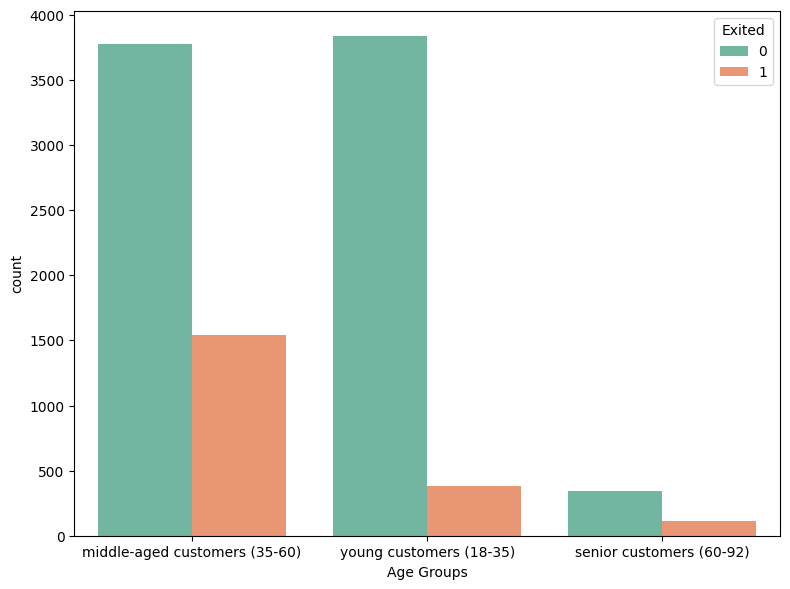

In [13]:
plt.figure(figsize=(8, 6))

sns.countplot(x=age_bins, hue='Exited', data=customer_df, palette='Set2')
plt.xlabel('Age Groups')

plt.tight_layout()

plt.show()

Looks like middle-aged customers are the ones that exit the most followed by young and then senior customers

In [14]:
acc_balance_bins = []

for val in customer_df['Balance']:
    if 200000 < val < 260000:
        acc_balance_bins.append('(200-260K)')
    elif 100000 < val < 200000:
        acc_balance_bins.append('(100-200K)')
    else:
        acc_balance_bins.append('(0-100K)')

acc_balance_bins = pd.Series(acc_balance_bins)

print(acc_balance_bins)

0         (0-100K)
1         (0-100K)
2       (100-200K)
3         (0-100K)
4       (100-200K)
           ...    
9995      (0-100K)
9996      (0-100K)
9997      (0-100K)
9998      (0-100K)
9999    (100-200K)
Length: 10000, dtype: object


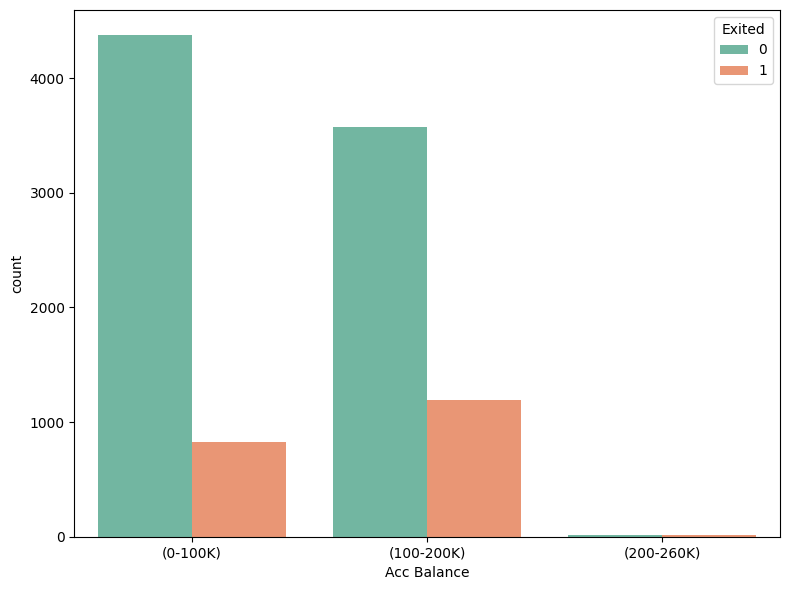

In [15]:
plt.figure(figsize=(8, 6))

sns.countplot(x=acc_balance_bins, hue='Exited', data=customer_df, palette='Set2')
plt.xlabel('Acc Balance')

plt.tight_layout()

plt.show()

Looks like there are very few people with account balance above 200K

In [16]:
salary_bins = []

for val in customer_df['EstimatedSalary']:
    if 150000 < val < 200000:
        salary_bins.append('(150-200K)')
    elif 100000 < val < 150000:
        salary_bins.append('(100-150K)')
    elif 50000 < val < 100000:
        salary_bins.append('(50-100K)')
    else:
        salary_bins.append('(0-50K)')

salary_bins = pd.Series(salary_bins)

print(salary_bins)

0       (100-150K)
1       (100-150K)
2       (100-150K)
3        (50-100K)
4        (50-100K)
           ...    
9995     (50-100K)
9996    (100-150K)
9997       (0-50K)
9998     (50-100K)
9999       (0-50K)
Length: 10000, dtype: object


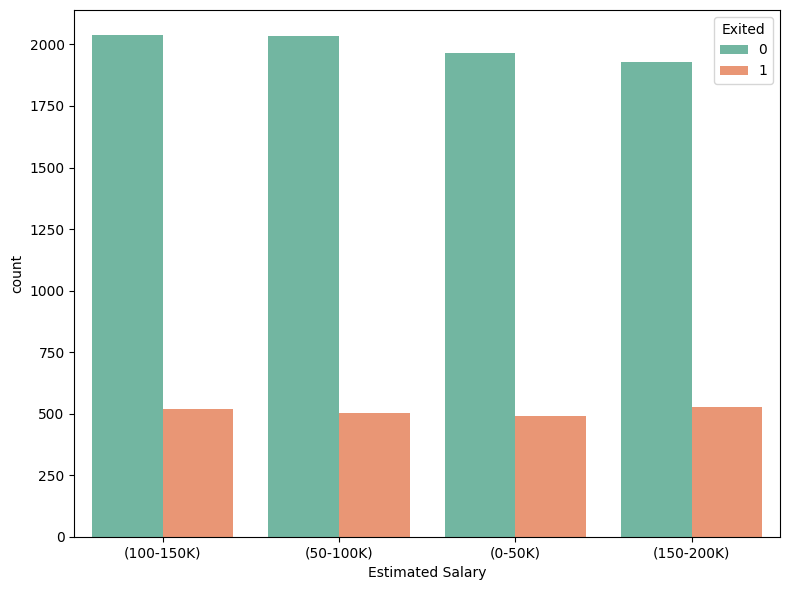

In [17]:
plt.figure(figsize=(8, 6))

sns.countplot(x=salary_bins, hue='Exited', data=customer_df, palette='Set2')
plt.xlabel('Estimated Salary')

plt.tight_layout()

plt.show()

Looks like the number of customers who exited is similar in all salary slabs

In [18]:
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Let's see a correlation matrix of all the features vs the target variable**

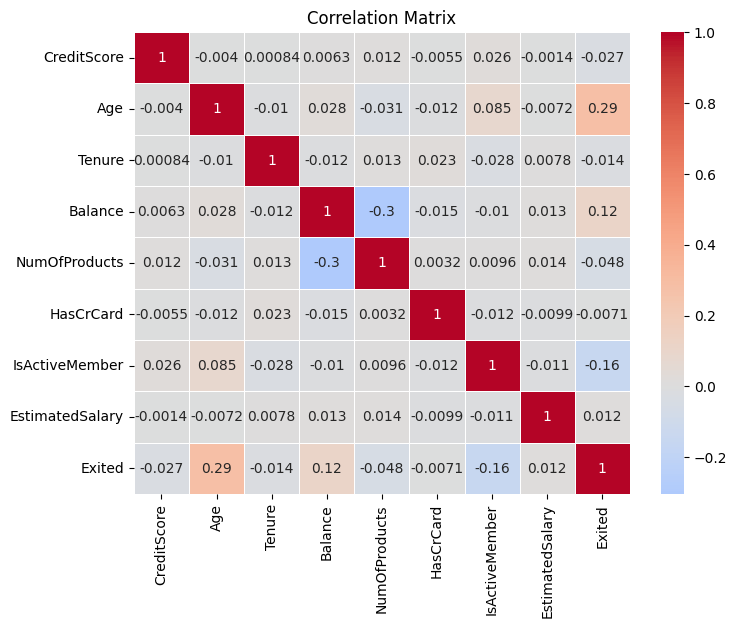

In [19]:
corr_df = customer_df.drop(['Geography', 'Gender'], axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

There isn't any strong correlation between any features 

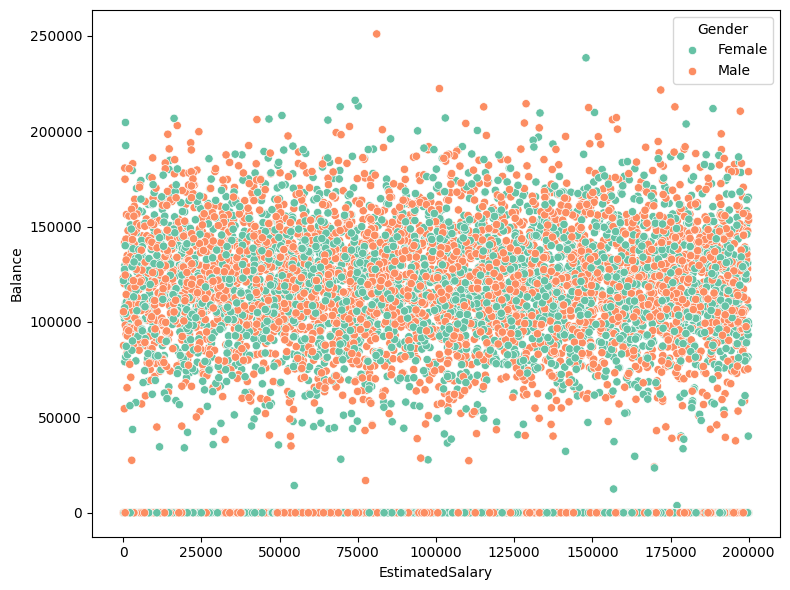

In [20]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='EstimatedSalary', y='Balance', data=customer_df, palette='Set2', hue='Gender')

plt.tight_layout()

plt.show()

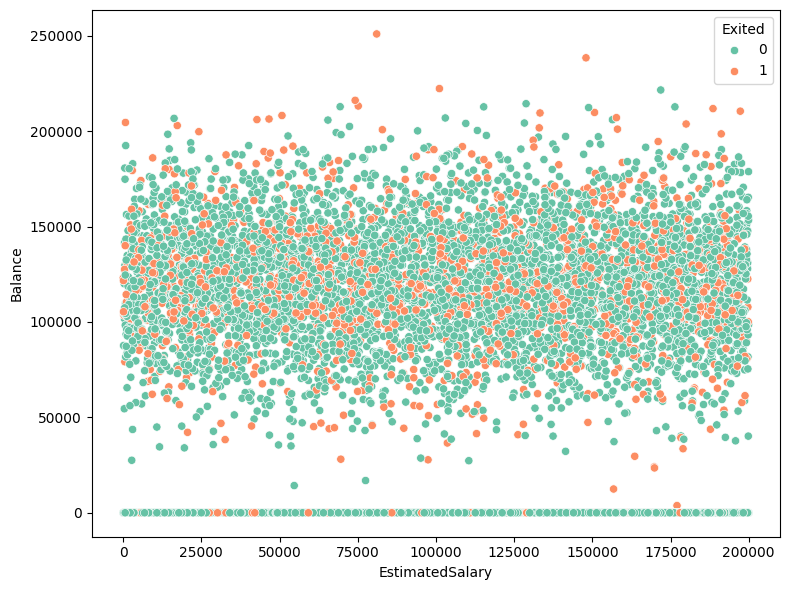

In [21]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='EstimatedSalary', y='Balance', data=customer_df, palette='Set2', hue='Exited')

plt.tight_layout()

plt.show()

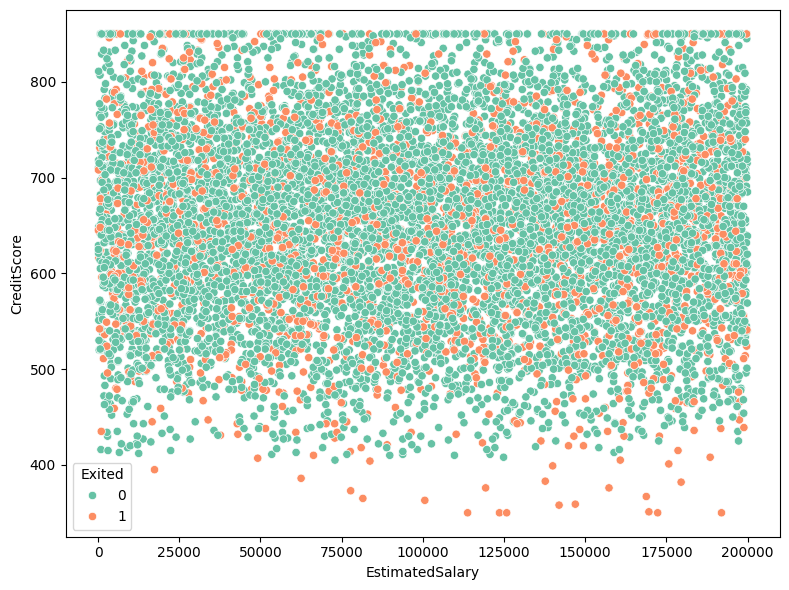

In [22]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='EstimatedSalary', y='CreditScore', data=customer_df, palette='Set2', hue='Exited')

plt.tight_layout()

plt.show()

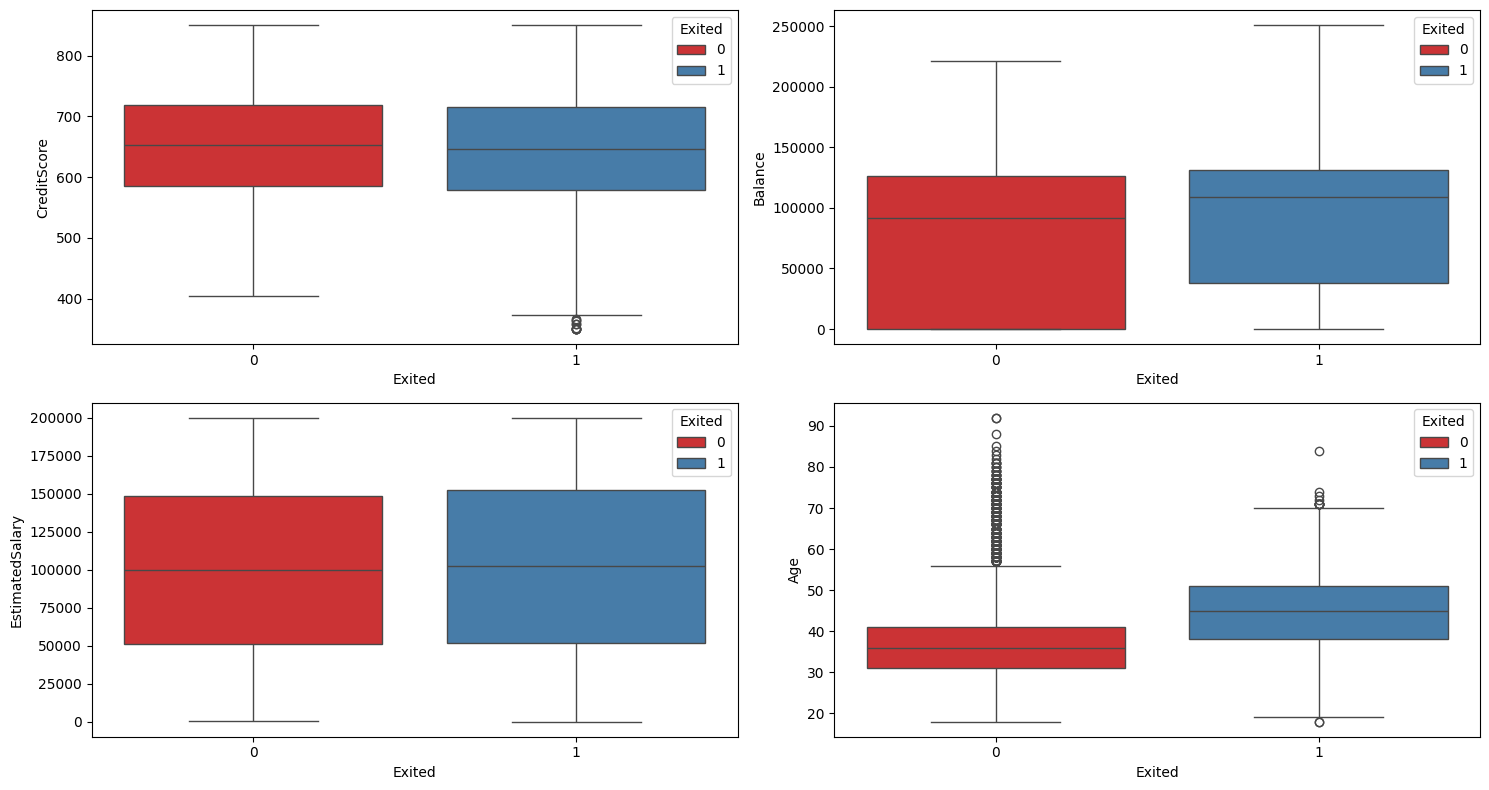

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

sns.boxplot(x='Exited', y='CreditScore', data=customer_df, palette='Set1', ax=axes[0,0], hue='Exited')
# axes[0,0].set_title('Gender vs Exited')

sns.boxplot(x='Exited', y='Balance', data=customer_df, palette='Set1', ax=axes[0,1], hue='Exited')
# axes[0,1].set_title('Geography vs Exited')

sns.boxplot(x='Exited', y='EstimatedSalary', data=customer_df, palette='Set1', ax=axes[1,0], hue='Exited')
# axes[1,0].set_title('HasCreditCard vs Exited')

sns.boxplot(x='Exited', y='Age', data=customer_df, palette='Set1', ax=axes[1,1], hue='Exited')
# axes[1,1].set_title('IsActiveMember vs Exited')

plt.tight_layout()

plt.show()

1. In the last boxplot (Age vs Exited) we can see that it's telling us that the majority of outliers are in the age group of 60-90 
But I don't think these can be considered  as real outliers since a bank can have customers belonging to different age groups and 
in this case there might not be enough data for customers in 60-90 age group

2. Also in the first plot we can see that there are a few points in the Exited (YES) plot whose credit score is below 400 suggesting that they might be
defaulters

3. For estimatedsalary vs exited, The median, and the IQR of exited people and non-exited people almost overlaps each other. So it tells us that there isn't much difference between the salaries of people who exit and people who stay. Same goes for creditscore vs exited.

## Data Preprocessing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
customer_df = pd.read_csv('../datasets/Customer_Churn.csv')

In [26]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
customer_df = customer_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [28]:
customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# Encoding categorical variables

customer_df_encoded = pd.get_dummies(customer_df, columns=['Geography', 'Gender'], prefix=None)

In [30]:
customer_df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [31]:
# saving the dataframe (checkpoint)

customer_df_encoded.to_csv('../datasets/Customer_Churn_Encoded.csv', index=False)

## Machine Learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
customer_df_encoded = pd.read_csv('../datasets/Customer_Churn_Encoded.csv')

In [7]:
# Making a generic function to split the dataset and train-evaluate the model using cross validation

def train_and_evaluate(df, estimator, param_grid, scaling='minmax'):
    # CREATE X and y
    X = df.drop('Exited', axis=1)
    y = df['Exited']

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

    # SCALE DATA
    scaler = MinMaxScaler() 
    if scaling == 'standard':
        scaler = StandardScaler()
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform Grid Search Cross-Validation
    grid_model = GridSearchCV(estimator=estimator,
                              param_grid=param_grid,
                              scoring='accuracy',
                              cv=5,
                              verbose=0)

    # Fit the model
    grid_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_preds = grid_model.predict(X_test_scaled)

    # Return the model, test set, and predictions
    return grid_model, y_test, y_preds, X_test_scaled

In [35]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'C': [0.01, 0.1, 1.0, 10, 100],                # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],       # Optimization algorithms
    'class_weight': [None, 'balanced'],             # Class balancing for imbalanced datasets
    'max_iter': [100, 200, 300],                    # Number of iterations
    'l1_ratio': [0.1, 0.5, 0.9]                    # Applicable only if penalty='elasticnet'
}

logistic_model = LogisticRegression()

In [36]:
grid_model, y_test, y_preds, X_test_scaled = train_and_evaluate(customer_df_encoded, logistic_model, param_grid)

/opt/anaconda3/envs/python_311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/python_311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/python_311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/python_311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/python_311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'el

In [37]:
grid_model.best_params_

{'C': 0.1,
 'class_weight': None,
 'l1_ratio': 0.5,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

In [39]:
cm = confusion_matrix(y_test, y_preds)

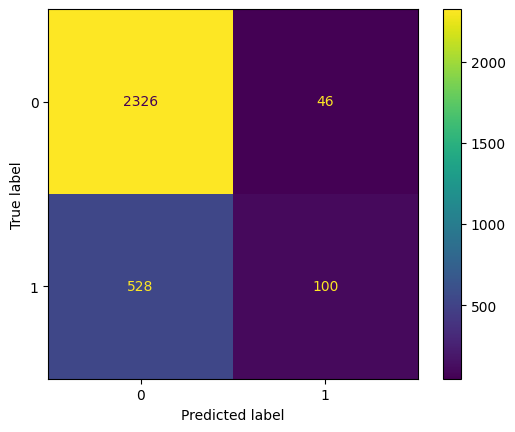

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2372
           1       0.68      0.16      0.26       628

    accuracy                           0.81      3000
   macro avg       0.75      0.57      0.57      3000
weighted avg       0.79      0.81      0.76      3000



### Classification Report Summary

**Precision:**
1. Class 0: Precision of 0.81 means that 81% of the instances predicted as class 0 are actually class 0.
2. Class 1: Precision of 0.68 means that 68% of the instances predicted as class 1 are actually class 1.
3. Overall: A higher precision indicates a lower false positive rate.

**Recall:**
1. Class 0: Recall of 0.98 indicates that the model correctly identifies 98% of actual class 0 instances.
2. Class 1: Recall of 0.16 means that the model correctly identifies only 16% of actual class 1 instances.
3. Overall: High recall for class 0 suggests the model is very good at detecting true negatives, but low recall for class 1 indicates it misses a lot of true positives.

**F1-Score:**

This is the harmonic mean of precision and recall, providing a balance between the two metrics.
1. Class 0: F1-score of 0.89 suggests a strong performance for class 0.
2. Class 1: F1-score of 0.26 indicates poor performance for class 1, reflecting the low precision and recall.


Overall the model is able to classify 81% of the data points accurately and that's understandable because our dataset has an imbalanced target variable,
meaning there are more instances of one class than the other. The real accuracy of this model can only be evaluated on test data (data that the model has never seen before).


In [42]:
precision, recall, _ = precision_recall_curve(y_test, y_preds)

# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [51]:
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score

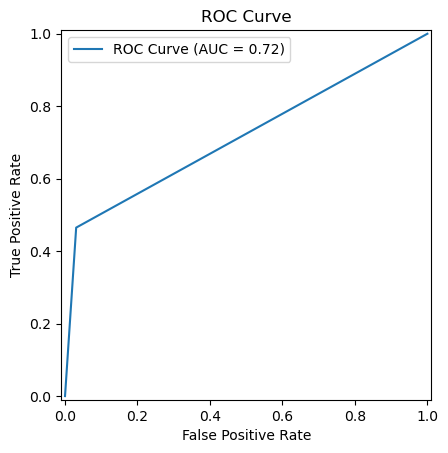

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Calculate AUC
auc = roc_auc_score(y_test, y_preds)

# Display the ROC curve
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
disp.plot()

plt.title('ROC Curve')
plt.legend(['ROC Curve (AUC = {:.2f})'.format(auc)])  # Set legend manually
plt.show()

In [45]:
import seaborn as sns

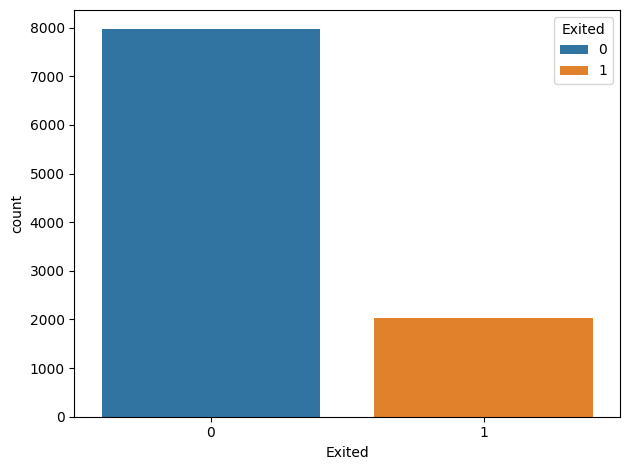

In [46]:
sns.countplot(x='Exited', data=customer_df_encoded, hue='Exited')
plt.tight_layout()
plt.show()

In [55]:
def display_confusion_matrix(y_test, y_preds):

    cm = confusion_matrix(y_test, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def display_precision_recall_curve(y_test, y_preds):

    precision, recall, _ = precision_recall_curve(y_test, y_preds)

    # Display the precision-recall curve
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()


def display_roc_auc(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test, y_preds)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_preds)

    # Display the ROC curve
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    disp.plot()
    
    plt.title('ROC Curve')
    plt.legend(['ROC Curve (AUC = {:.2f})'.format(auc)])  # Set legend manually
    plt.show()

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
X = customer_df_encoded.drop('Exited', axis=1)
y = customer_df_encoded['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [33]:
# Train a classifier for different values of k

results = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.670667
1    2  0.770667
2    3  0.729000
3    4  0.775667
4    5  0.758000
5    6  0.780333
6    7  0.766000
7    8  0.780667
8    9  0.773333
9   10  0.786333
10  11  0.780333
11  12  0.787333
12  13  0.784000
13  14  0.788333
14  15  0.785000
15  16  0.787000
16  17  0.785000
17  18  0.789000
18  19  0.787667
19  20  0.790000


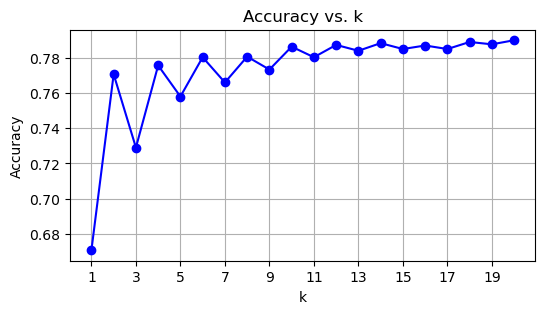

In [35]:
plt.figure(figsize=(6, 3))
plt.plot(results['k'], results['accuracy'], marker='o', color='b', linestyle='-')
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(results['k']), max(results['k']) + 1, 2)) 
plt.grid(True)
plt.show()

In [37]:
k_values = [k for k in range(1,20)]
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [39]:
# taking weights as a hyperparamter

param_grid = {
    'n_neighbors': k_values,  # K values
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

In [51]:
knn_model, y_test, y_preds, X_test_scaled = train_and_evaluate(customer_df_encoded, knn, param_grid, scaling='standard')

In [52]:
knn_model.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

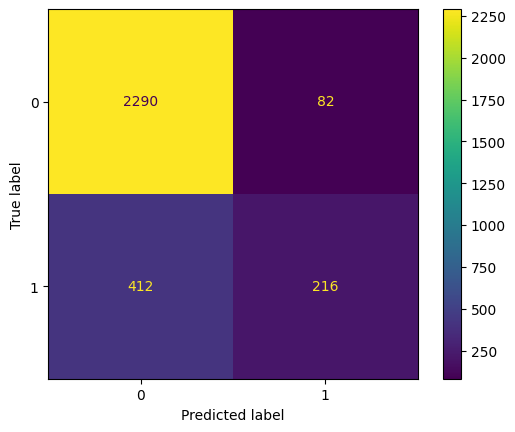

In [53]:
display_confusion_matrix(y_test, y_preds)

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2372
           1       0.72      0.34      0.47       628

    accuracy                           0.84      3000
   macro avg       0.79      0.65      0.68      3000
weighted avg       0.82      0.84      0.81      3000



In [68]:
display_precision_recall_curve(y_test, y_preds)

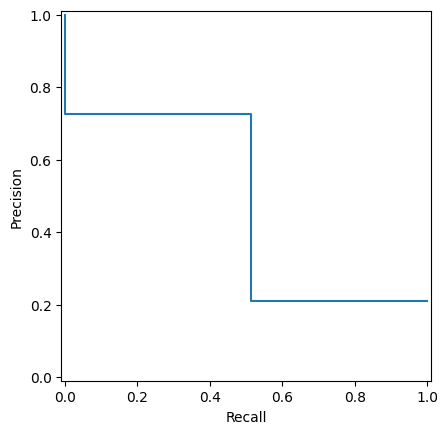

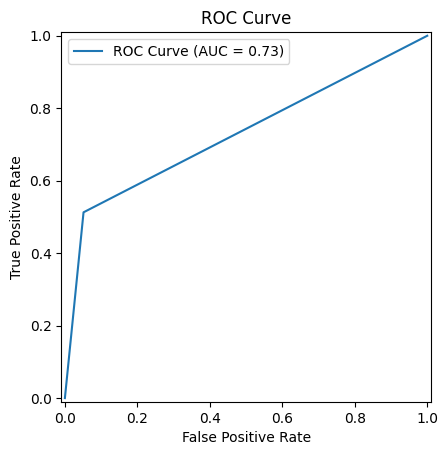

In [69]:
display_roc_auc(y_test, y_preds)

### Decision Tree Classifier

In [59]:
customer_df_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
param_grid = {            
    'max_depth': [None, 5, 10, 15, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20, 50],         # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10, 20, 50],          # Minimum number of samples to be a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for each split
    'max_leaf_nodes': [None, 10, 20, 50, 100]        # Maximum number of leaf nodes in the tree
}


tree = DecisionTreeClassifier()
print(param_grid)

{'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [1, 5, 10, 20, 50], 'max_features': [None, 'sqrt', 'log2'], 'max_leaf_nodes': [None, 10, 20, 50, 100]}


In [64]:
treeModel, y_test, y_preds, X_test_scaled = train_and_evaluate(customer_df_encoded, tree, param_grid)

In [65]:
treeModel.best_params_

{'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

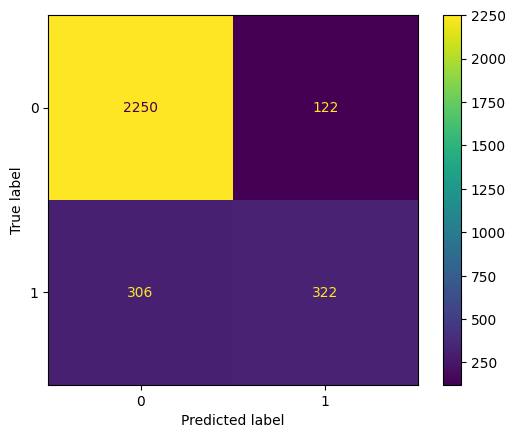

In [66]:
display_confusion_matrix(y_test, y_preds)

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2372
           1       0.73      0.51      0.60       628

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [70]:
display_precision_recall_curve(y_test, y_preds)

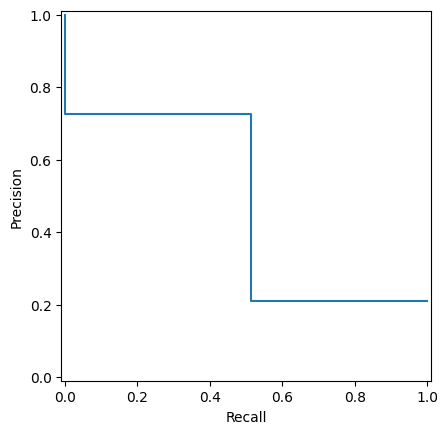

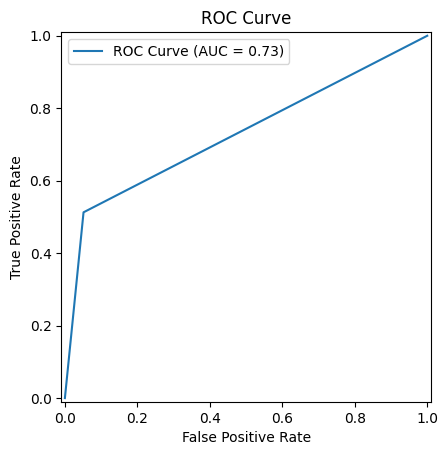

In [71]:
display_roc_auc(y_test, y_preds)

### Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
param_grid = {
    'n_estimators': [20, 40, 60, 80],                   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],                  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],                    # Minimum number of samples required to be at a leaf node
}

rf = RandomForestClassifier()

In [74]:
rfModel, y_test, y_preds, X_test_scaled = train_and_evaluate(customer_df_encoded, rf, param_grid)

In [76]:
rfModel.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 60}

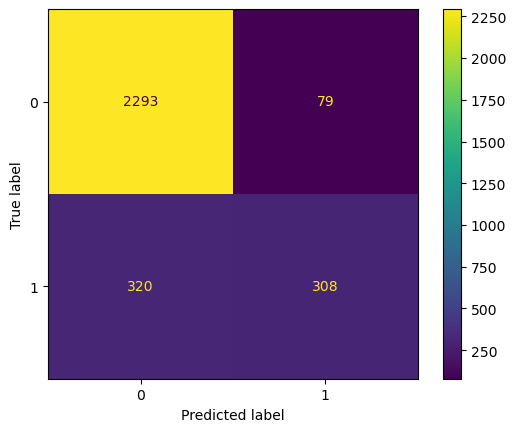

In [78]:
display_confusion_matrix(y_test, y_preds)

In [86]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2372
           1       0.80      0.49      0.61       628

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



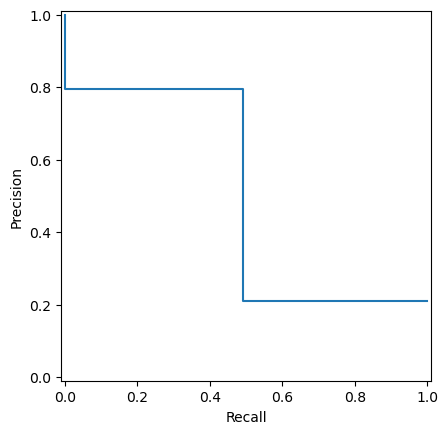

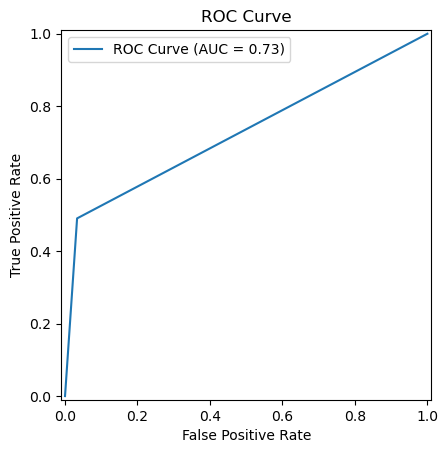

In [90]:
display_precision_recall_curve(y_test, y_preds)
display_roc_auc(y_test, y_preds)